In [1]:
import pandas as pd
import google.datalab as datalab
import os

### Daten laden

In [2]:
storage_bucket = 'gs://hallo-apisummit2018'
workspace_path = os.path.join(storage_bucket, 'export')
!gsutil ls -r {workspace_path}



Updates are available for some Cloud SDK components.  To install them,
please run:
  $ gcloud components update

gs://hallo-apisummit2018/export/:
gs://hallo-apisummit2018/export/2018-12-03.csv


In [8]:
csv = datalab.data.CsvFile('gs://hallo-apisummit2018/export/2018-12-03.csv')
df = csv.browse(headers=["id", "todo", "date"])
print (df.dtypes)
df.head(2)

id      object
todo    object
date    object
dtype: object


,id,todo,date
0,c9cd77c9-fe99-46e8-abf0-b91c2617510a,Reduced composite matrix,2018-02-03 00:00:00
1,a4546a94-3f21-470b-8f95-47dc9d3013f5,Enhanced coherent infrastructure,2018-06-02 00:00:00


### Daten aufbereiten

In [9]:

df['date'] = pd.to_datetime(df['date'])
tf = df.set_index('date')
tf.head(5)

,id,todo
date,,
2018-02-03,c9cd77c9-fe99-46e8-abf0-b91c2617510a,Reduced composite matrix
2018-06-02,a4546a94-3f21-470b-8f95-47dc9d3013f5,Enhanced coherent infrastructure
2018-06-14,3c731466-21be-4a45-8944-d179a580e151,Ameliorated fault-tolerant function
2018-05-12,ffce4a87-23f6-4342-8a4b-050dafdda1e3,Extended heuristic secured line
2017-12-02,f8d04897-a0f5-4d16-8d8e-32903c06d9b1,Persevering incremental customer loyalty


### Visualisierung

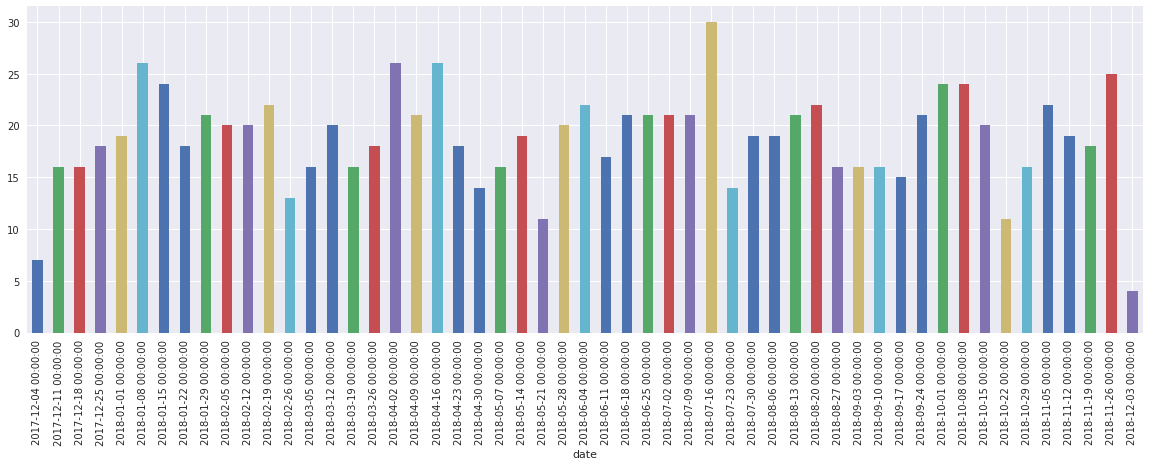

In [14]:
# ToDos pro Woche
import matplotlib.pyplot as plt 
plt.rcParams["figure.figsize"] = [20,6]
tf['id'].resample('W-MON').count().plot(kind='bar');